In [50]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 

# 전처리

In [51]:
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')
df=train.copy()
test_df=test.copy()
df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [52]:
df.columns.unique()


Index(['date_time', 'wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability', 'number_of_rentals'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [54]:
df.columns = ['date', 'wind', 'sky', 'prec','winds','hum','ltem','htem','pp','rentals']
df.head()

,date,wind,sky,prec,winds,hum,ltem,htem,pp,rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [55]:
test_df.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [56]:
test_df.columns = ['date', 'wind', 'sky', 'prec','winds','hum','ltem','htem','pp']
test_df.head()

,date,wind,sky,prec,winds,hum,ltem,htem,pp
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [57]:
df.head()
df.isnull().sum()

date       0
wind       0
sky        0
prec       0
winds      0
hum        0
ltem       0
htem       0
pp         0
rentals    0
dtype: int64

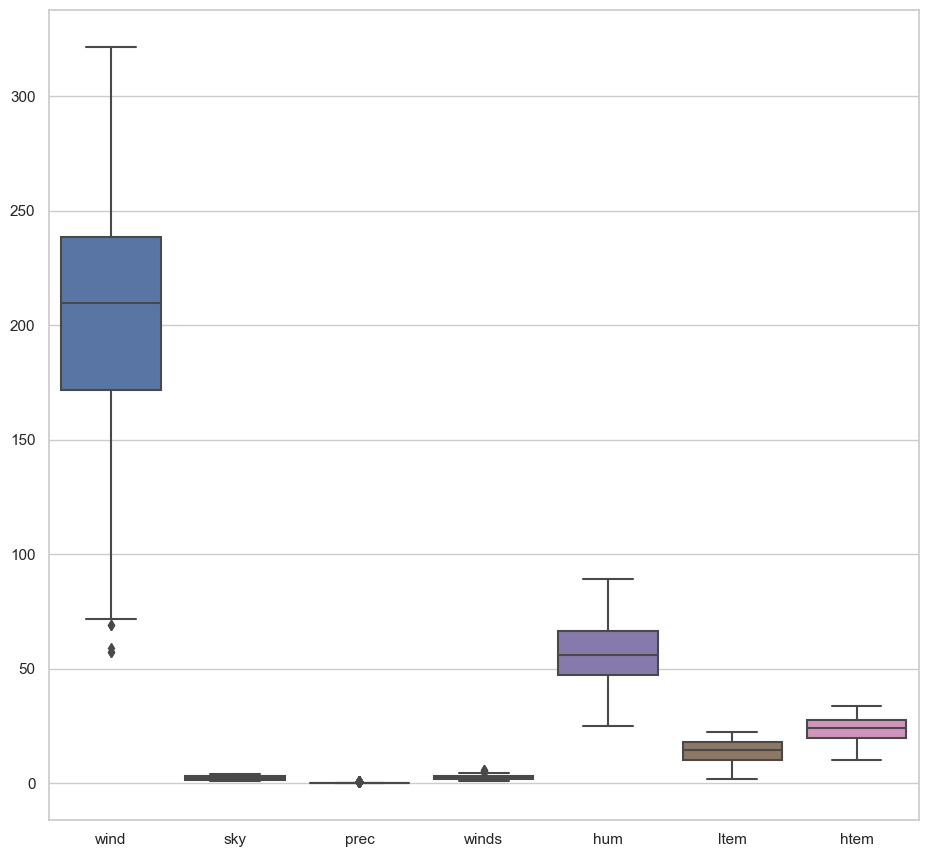

In [58]:
# just to visualize.
sns.boxplot(data=df[['wind',
       'sky', 'prec', 'winds', 'hum', 'ltem', 'htem']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [59]:
#df["hour"] = [t.hour for t in pd.DatetimeIndex(df.date)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.date)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.date)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.date)]
df.head()

,date,wind,sky,prec,winds,hum,ltem,htem,pp,rentals,day,month,year
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,6,4,2018
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,0,4,2018
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1,4,2018
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2,4,2018
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,3,4,2018


In [60]:
#test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.date)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.date)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.date)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.date)]
test_df.head()

,date,wind,sky,prec,winds,hum,ltem,htem,pp,day,month,year
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,3,4,2021
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,4,4,2021
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,5,4,2021
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,6,4,2021
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,0,4,2021


In [61]:
# now can drop datetime column.
df.drop('date',axis=1,inplace=True)
df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,rentals,day,month,year
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,6,4,2018
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,0,4,2018
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1,4,2018
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2,4,2018
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,3,4,2018


In [62]:
# now can drop datetime column.
test_df.drop('date',axis=1,inplace=True)
test_df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,day,month,year
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,3,4,2021
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,4,4,2021
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,5,4,2021
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,6,4,2021
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,0,4,2021


In [63]:
from scipy import stats
from scipy.stats import norm

((array([-2.80245302, -2.50314387, -2.33342644, -2.2123571 , -2.11701911,
         -2.03775489, -1.96954381, -1.90942799, -1.85551213, -1.8065059 ,
         -1.76148955, -1.71978349, -1.68087071, -1.6443484 , -1.60989637,
         -1.57725567, -1.54621384, -1.51659425, -1.48824845, -1.4610504 ,
         -1.43489214, -1.40968045, -1.38533425, -1.36178258, -1.33896294,
         -1.31682001, -1.29530456, -1.27437256, -1.2539845 , -1.23410477,
         -1.21470116, -1.19574441, -1.17720789, -1.15906727, -1.14130026,
         -1.12388641, -1.10680685, -1.09004421, -1.07358239, -1.05740647,
         -1.0415026 , -1.02585789, -1.01046033, -0.99529867, -0.98036243,
         -0.96564175, -0.95112741, -0.93681073, -0.92268353, -0.90873812,
         -0.89496724, -0.88136402, -0.86792197, -0.85463494, -0.84149711,
         -0.82850294, -0.81564718, -0.80292483, -0.79033114, -0.77786156,
         -0.76551178, -0.75327766, -0.74115526, -0.72914081, -0.7172307 ,
         -0.70542147, -0.69370981, -0.

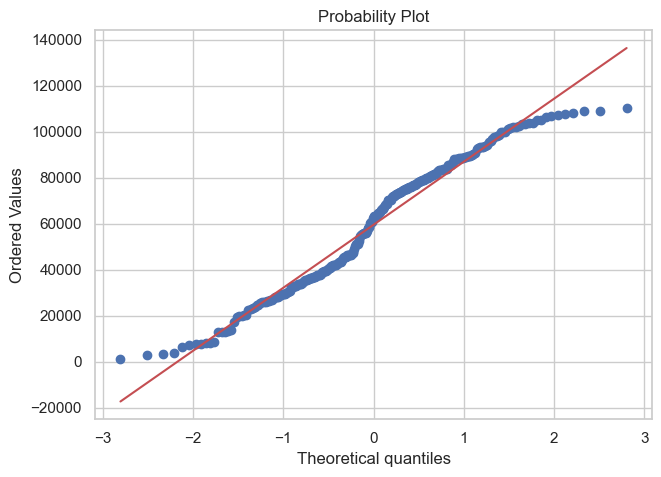

In [64]:
stats.probplot(df['rentals'], plot = plt)


### 왜도가 그렇게 심한것 같진 않음 

# EDA

In [65]:
# 다시 데이터 보고 eda 어떻게 할지 파악 
df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,rentals,day,month,year
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,6,4,2018
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,0,4,2018
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1,4,2018
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2,4,2018
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,3,4,2018


In [67]:
df.tail()

,wind,sky,prec,winds,hum,ltem,htem,pp,rentals,day,month,year
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,4,6,2020
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,5,6,2020
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,6,6,2020
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,0,6,2020
272,120.797,3.622,0.432,5.574,77.061,19.125,26.053,41.284,38086,1,6,2020


월별, 년도별로 한번 시각화해보자

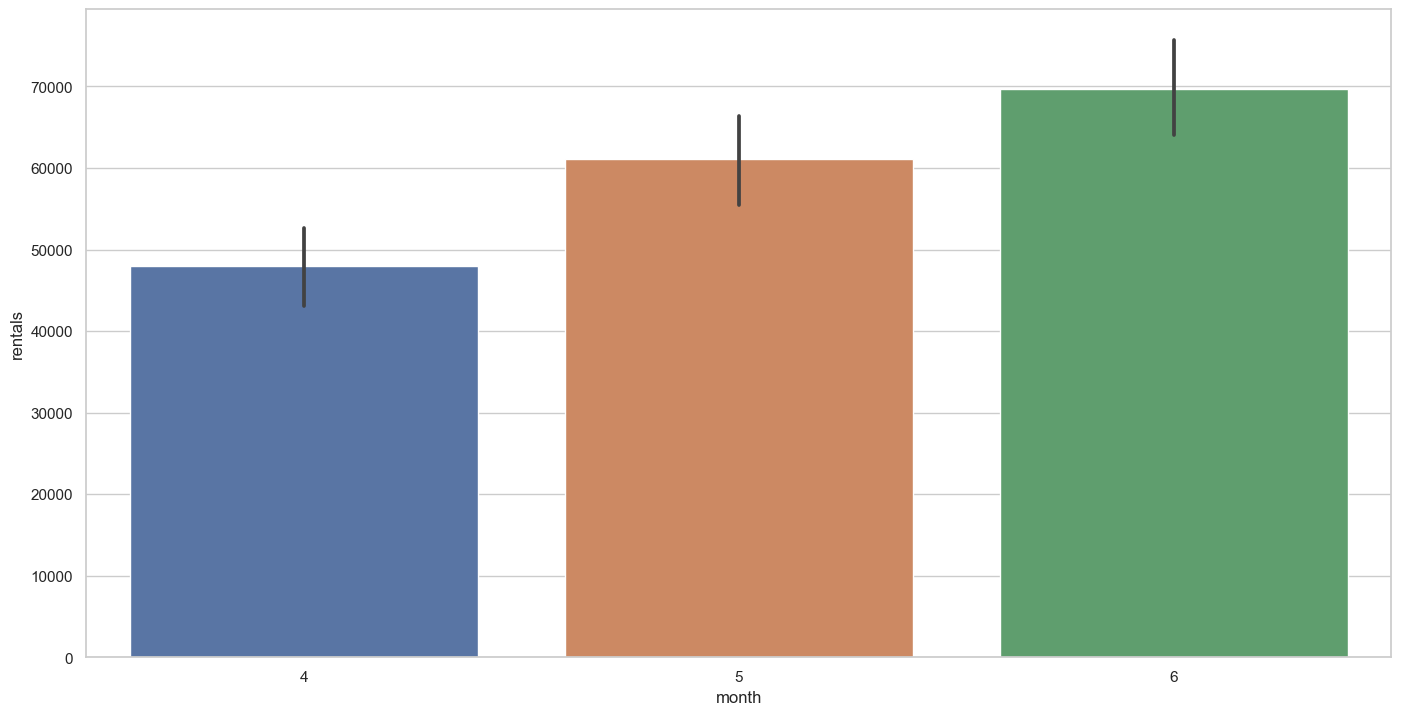

In [66]:
sns.barplot(x='month',data=df, y='rentals')
plt.gcf().set_size_inches(15, 8)



날씨가 좋은 5월달부터 대여량이 증가해서 6월에 가장 많음 

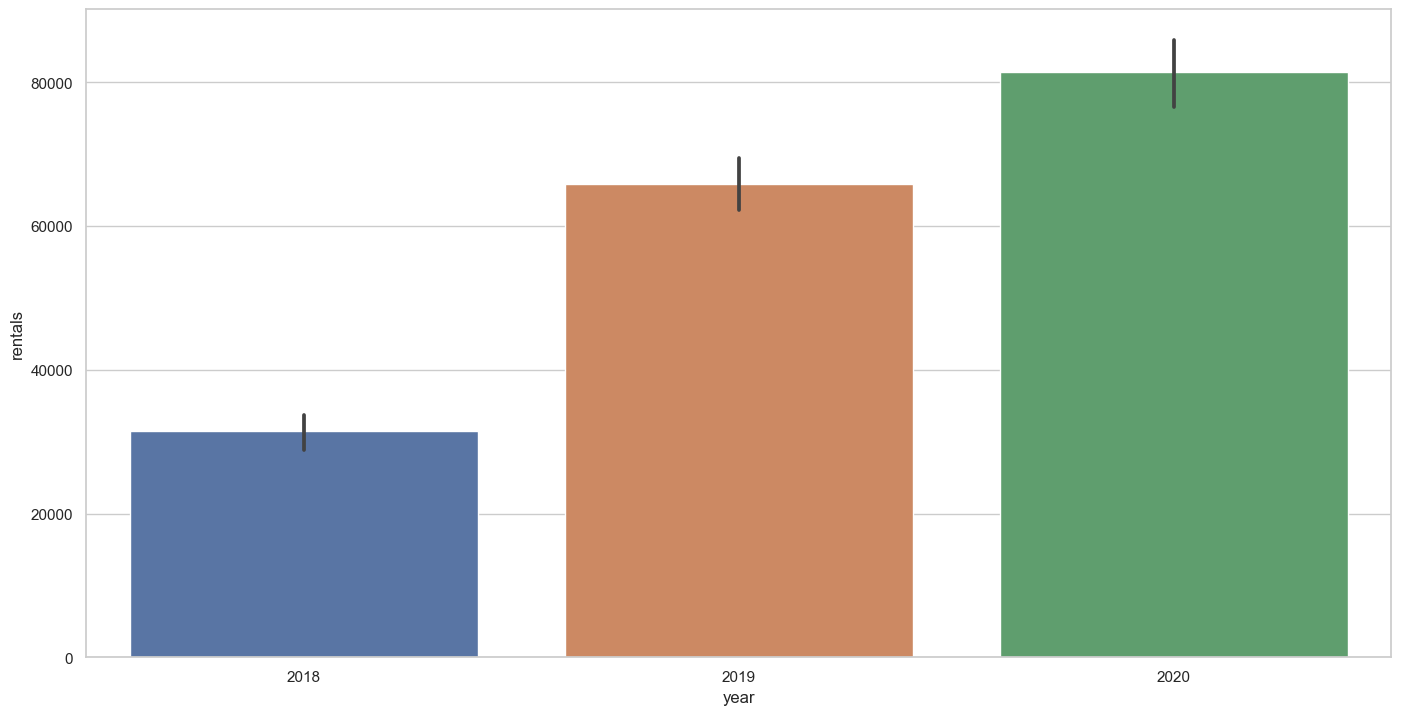

In [79]:
sns.barplot(x='year',data=df, y='rentals')
plt.gcf().set_size_inches(15, 8)

대여량은 매해 증가중 

In [69]:
df[['month', 'prec']].groupby('month').mean()


,prec
month,
4,0.083933
5,0.115011
6,0.103478


In [70]:
df[['month', 'sky']].groupby('month').mean()


,sky
month,
4,2.209333
5,2.302538
6,2.352422


확실히 4,5,6월달에는 비오는날도 거의 없고 하늘 상태가 상대적으로 좋다는걸 확인함 

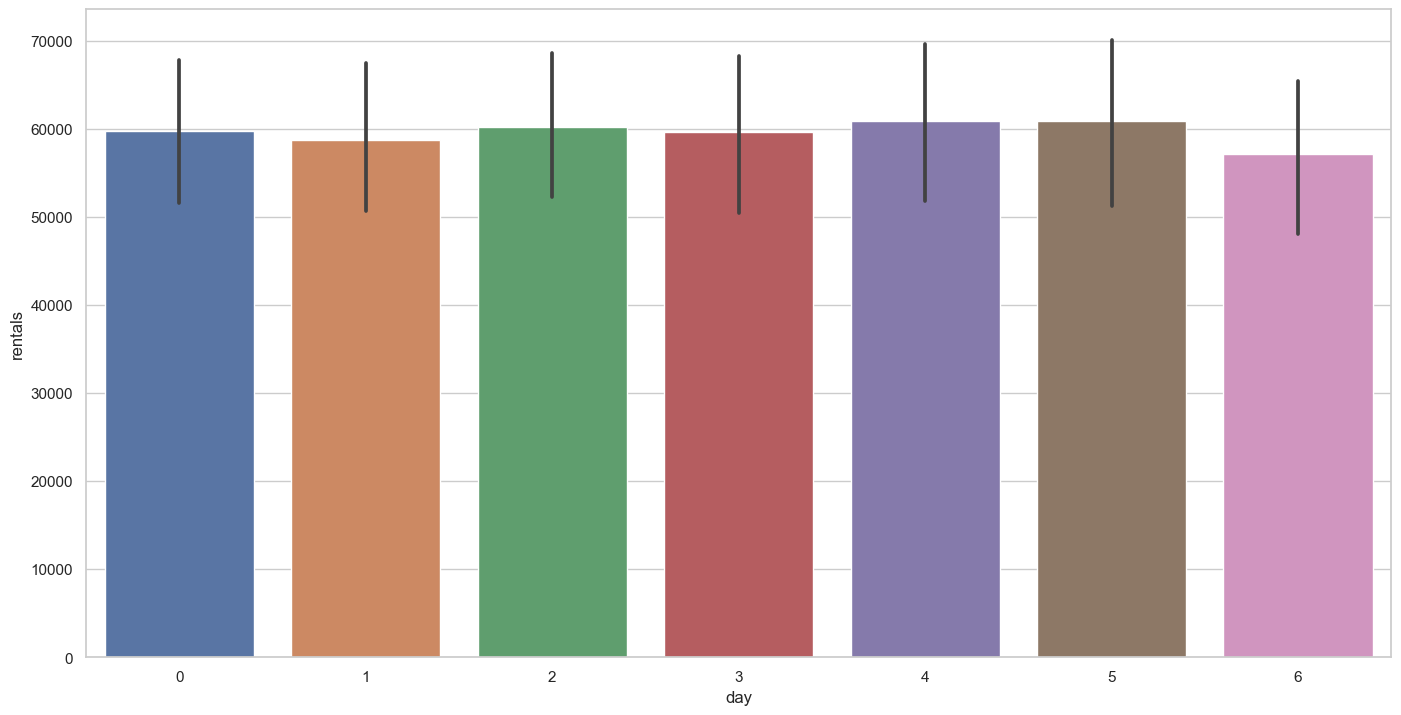

In [71]:
sns.barplot(x='day',data=df, y='rentals')
plt.gcf().set_size_inches(15, 8)

In [73]:
df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,rentals,day,month,year
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,6,4,2018
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,0,4,2018
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1,4,2018
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2,4,2018
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,3,4,2018


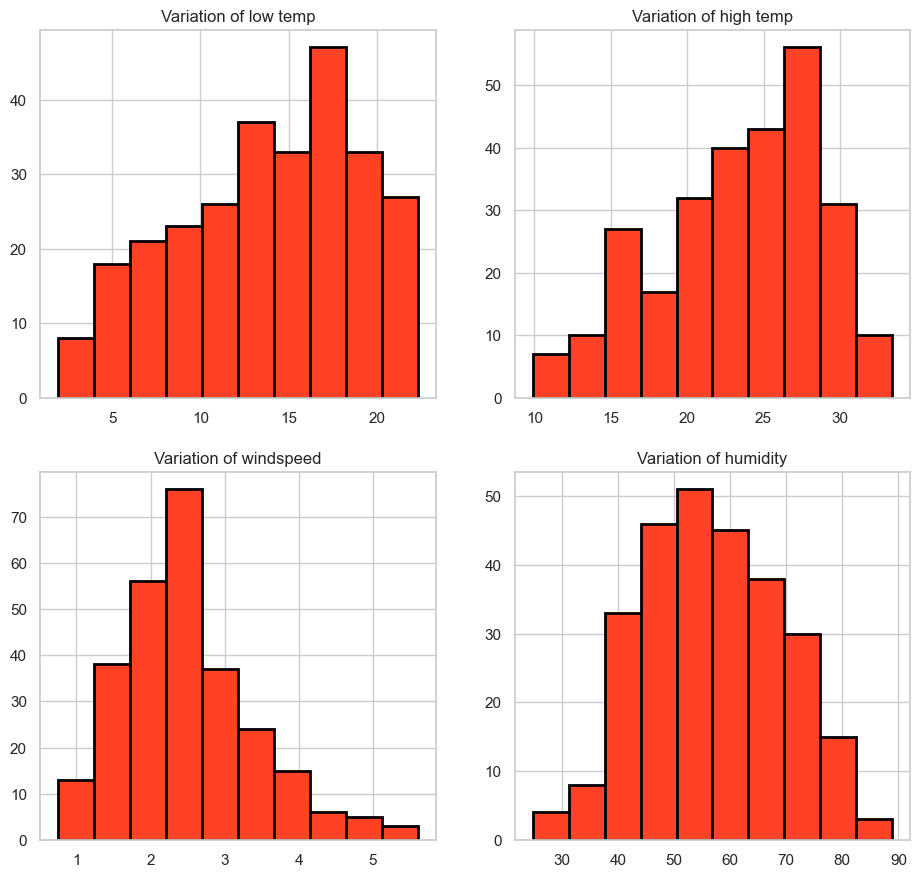

In [76]:
# can also be visulaized using histograms for all the continuous variables.
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="ltem",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of low temp")
axes[0,1].hist(x="htem",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of high temp")
axes[1,0].hist(x="winds",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

In [86]:
temp = df[['month', 'htem', 'ltem']].groupby('month').mean()
temp

,htem,ltem
month,,
4,17.696211,8.039022
5,24.113108,14.265247
6,28.320600,19.065811


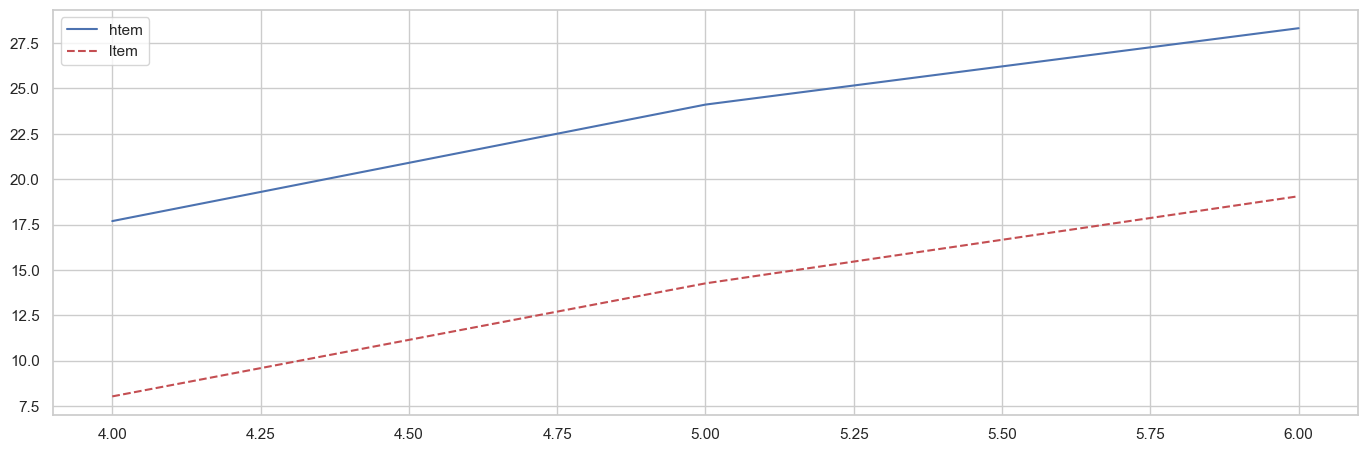

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(temp.index, temp.htem, color = 'b', label = 'htem')
plt.plot(temp.index, temp.ltem, color = 'r', ls = '--', label = 'ltem')
plt.legend()
plt.show()

<AxesSubplot:>

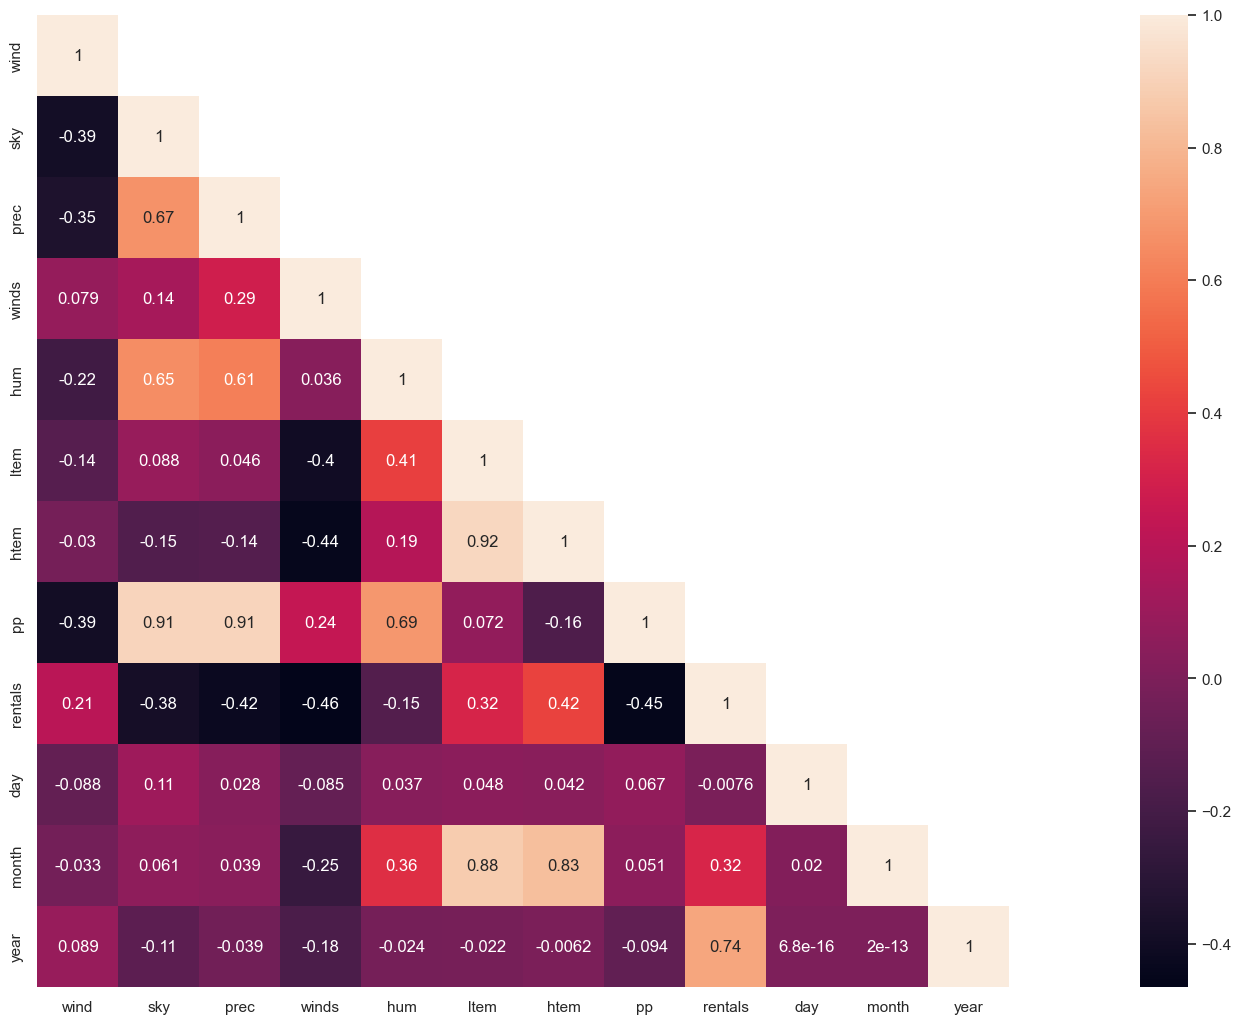

In [77]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

1) low temp이랑 high temp간의 상관계수가 높음 

2) 전반적으로 날씨가 좋은때라 대여량과 날씨간의 상관관계가 평이하지만 그래도 높음.  가장 많은 영향을 주는건 역시 높은 기온 

3) 여담이지만 역시 강수 형태는 구름양과 강수확률과 높은 연관관계가 있음 

### 그놈의 불쾌지수 만들어보기

In [96]:
def disgusting(df):
  df['discomfort_index']=df['htem']*1.8-0.55*(1-df['hum']/100)*(1.8*df['htem']-26)+32
  
disgusting(df)
df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,rentals,day,month,year,discomfort_index
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,6,4,2018,68.177500
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,0,4,2018,64.839468
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1,4,2018,59.352046
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2,4,2018,54.841094
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,3,4,2018,51.802038


In [97]:
disgusting(test_df)
test_df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,day,month,year,discomfort_index
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,3,4,2021,64.785676
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,4,4,2021,63.783407
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,5,4,2021,61.029320
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,6,4,2021,62.199837
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,0,4,2021,63.456064


In [101]:
def level_discomfort(df):
  if df['discomfort_index']>=80:
    df['discomfort_level']=4
  elif 75<=df['discomfort_index']<80:
    df['discomfort_level']=3
  elif 68<=df['discomfort_index']<75:
    df['discomfort_level']=2
  elif df['discomfort_index']<68:
    df['discomfort_level']=1


In [102]:
df.loc[df['discomfort_index']>=80,'discomfort_level']=4
df.loc[(df['discomfort_index']<80)&(df['discomfort_index']>=75),'discomfort_level']=3
df.loc[(df['discomfort_index']<75)&(df['discomfort_index']>=68),'discomfort_level']=2
df.loc[df['discomfort_index']<68,'discomfort_level']=1

In [103]:
df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,rentals,day,month,year,discomfort_index,discomfort_level
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,6,4,2018,68.177500,2.0
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,0,4,2018,64.839468,1.0
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,1,4,2018,59.352046,1.0
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2,4,2018,54.841094,1.0
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,3,4,2018,51.802038,1.0


In [104]:
test_df.loc[test_df['discomfort_index']>=80,'discomfort_level']=4
test_df.loc[(test_df['discomfort_index']<80)&(test_df['discomfort_index']>=75),'discomfort_level']=3
test_df.loc[(test_df['discomfort_index']<75)&(test_df['discomfort_index']>=68),'discomfort_level']=2
test_df.loc[test_df['discomfort_index']<68,'discomfort_level']=1
test_df.head()

,wind,sky,prec,winds,hum,ltem,htem,pp,day,month,year,discomfort_index,discomfort_level
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,3,4,2021,64.785676,1.0
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,4,4,2021,63.783407,1.0
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,5,4,2021,61.029320,1.0
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,6,4,2021,62.199837,1.0
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,0,4,2021,63.456064,1.0


In [105]:
dist = df[['discomfort_level', 'rentals']].groupby('discomfort_level').mean()
dist

,rentals
discomfort_level,
1.0,48387.864583
2.0,59866.425287
3.0,67454.402778
4.0,86313.222222


낮 최고기온과 습도로 불쾌지수를 계산한건데 왜 불쾌지수가 높을수록 자전거를 대여하죠? 뭐죠? 

- 우선 평균 기온이 아니라는 점 
- 불쾌지수 계산식에 대한 의문 

등으로 복잡함...

# 모델링

In [106]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('rentals',axis=1),df['rentals'],test_size=0.25,random_state=42)

In [107]:
import numpy as np

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [109]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
nmae=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    nmae.append(np.sqrt(NMAE(test_pred,y_test)))
d={'Modelling Algo':model_names,'NMAE':nmae}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'NMAE': [0.3958267215499199,
  0.42227290628530184,
  0.39943691346726934,
  0.6549664249123094,
  0.6347934894752152]}

In [110]:
NMAE_frame=pd.DataFrame(d)
NMAE_frame

,Modelling Algo,NMAE
0,RandomForestRegressor,0.395827
1,AdaBoostRegressor,0.422273
2,BaggingRegressor,0.399437
3,SVR,0.654966
4,KNeighborsRegressor,0.634793


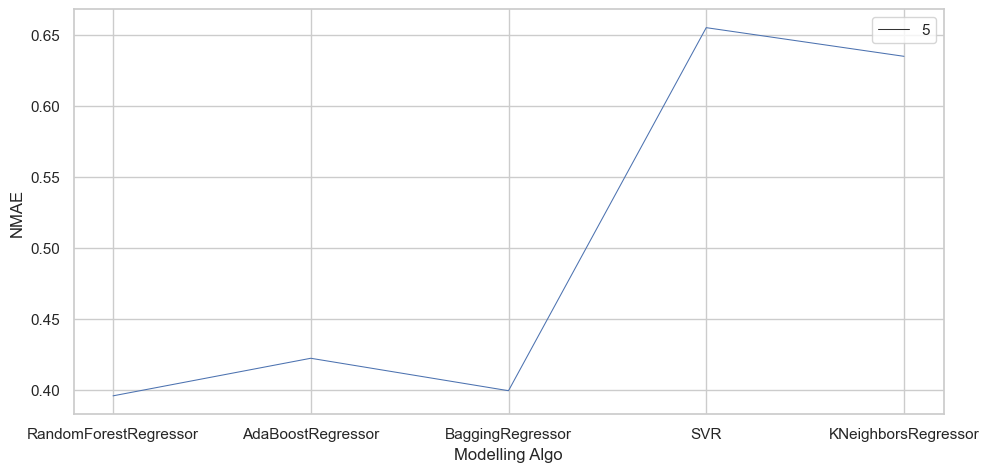

In [116]:
plt.figure(figsize=(10, 5))
fig = sns.lineplot(x='Modelling Algo',y='NMAE',data=NMAE_frame,size=5)
plt.show()

In [124]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(NMAE(pred,y_test))))

0.3959481803054943


In [126]:
pred=clf_rf.predict(test_df)
d={'datetime':test['date_time'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('sample_submission.csv',index=False) # saving to a csv file for predictions on kaggle.

In [128]:
ans

,datetime,count
0,2021-04-01,60406.510
1,2021-04-02,50945.360
2,2021-04-03,35658.046
3,2021-04-04,36103.848
4,2021-04-05,73947.178
...,...,...
86,2021-06-26,89871.980
87,2021-06-27,96936.548
88,2021-06-28,67516.630
89,2021-06-29,71603.932
